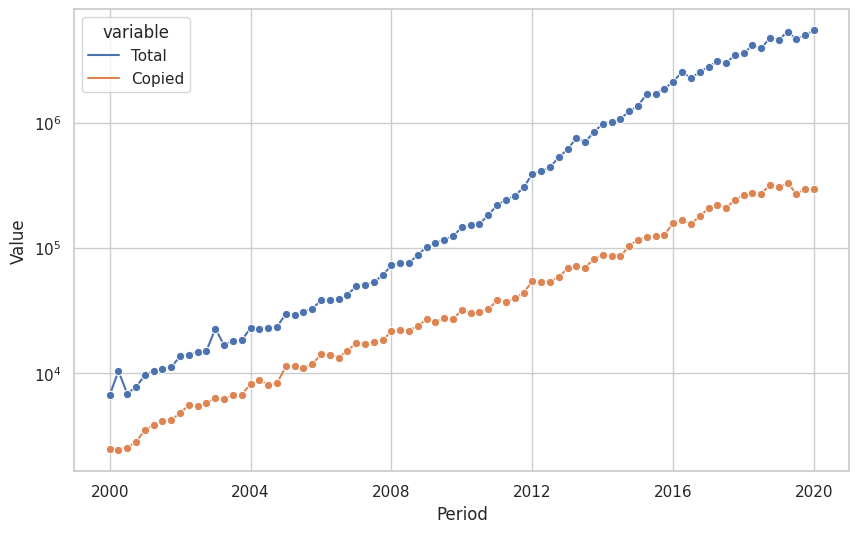

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
dfq = pd.read_csv("../data/blobs/set3_data.csv")

# Ensure the Period column is in datetime format
dfq["Period"] = pd.to_datetime(dfq["Period"])

# Filter data for the period 2000-01-01 to 2020-01-01
data_filtered = dfq[(dfq["Period"] >= "2000-01-01") & (dfq["Period"] <= "2020-01-01")]

# Summarize data by period
my = data_filtered.groupby("Period")[["Total", "Copied"]].sum().reset_index()

# Filter out non-positive values for log scaling
my = my[(my["Total"] > 0) & (my["Copied"] > 0)]

# Melt the data for plotting
molten = pd.melt(my, id_vars=["Period"], value_vars=["Total", "Copied"])

# Plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=molten, x="Period", y="value", hue="variable", marker="o")
plt.yscale("log")
plt.xlabel('Period')
plt.ylabel('Value')
plt.show()

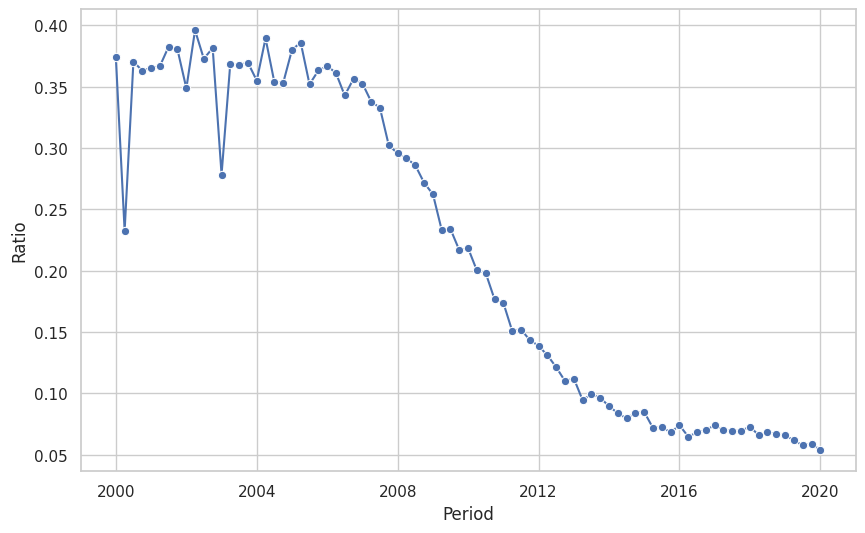

In [2]:
my["Ratio"] = my["Copied"] / my["Total"]

# Plot the Ratio over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=my, x="Period", y="Ratio", marker="o")
plt.xlabel('Period')
plt.ylabel('Ratio')
plt.show()

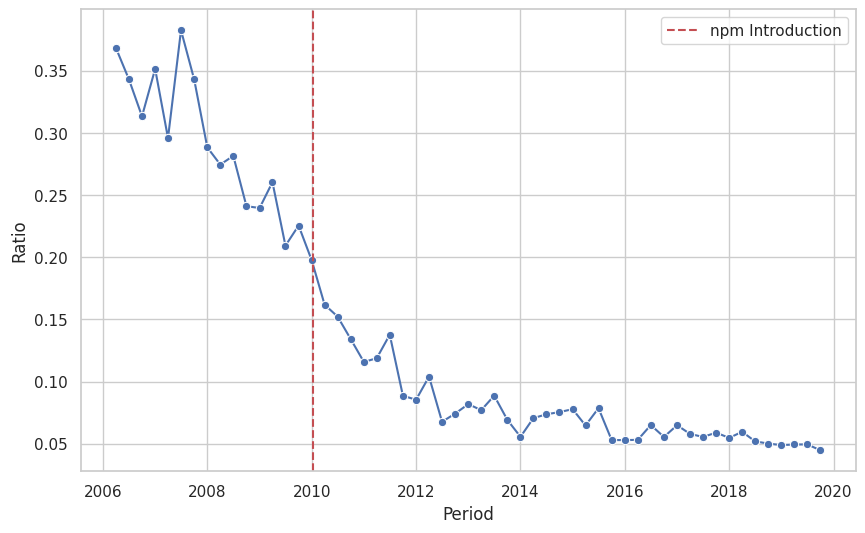

In [3]:
# Filter data for language "JS" and the specified period
filtered_data = dfq[(dfq["Lan"] == "JS") &
                    (dfq["Period"] > "2006-01-01") &
                    (dfq["Period"] < "2020-01-01")]

# Calculate the Ratio
filtered_data = filtered_data.copy()  # Avoid SettingWithCopyWarning
filtered_data["Ratio"] = filtered_data["Copied"] / filtered_data["Total"]
filtered_data["Ratio"].fillna(0, inplace=True)

# Plot the Ratio over time for the filtered data
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x="Period", y="Ratio", marker="o")

# Add a vertical line for the npm introduction date
npm_introduction_date = pd.to_datetime("2010-01-12")
plt.axvline(x=npm_introduction_date, color='r', linestyle='--', label='npm Introduction')

# Customize the plot
plt.xlabel('Period')
plt.ylabel('Ratio')
plt.legend()
plt.show()

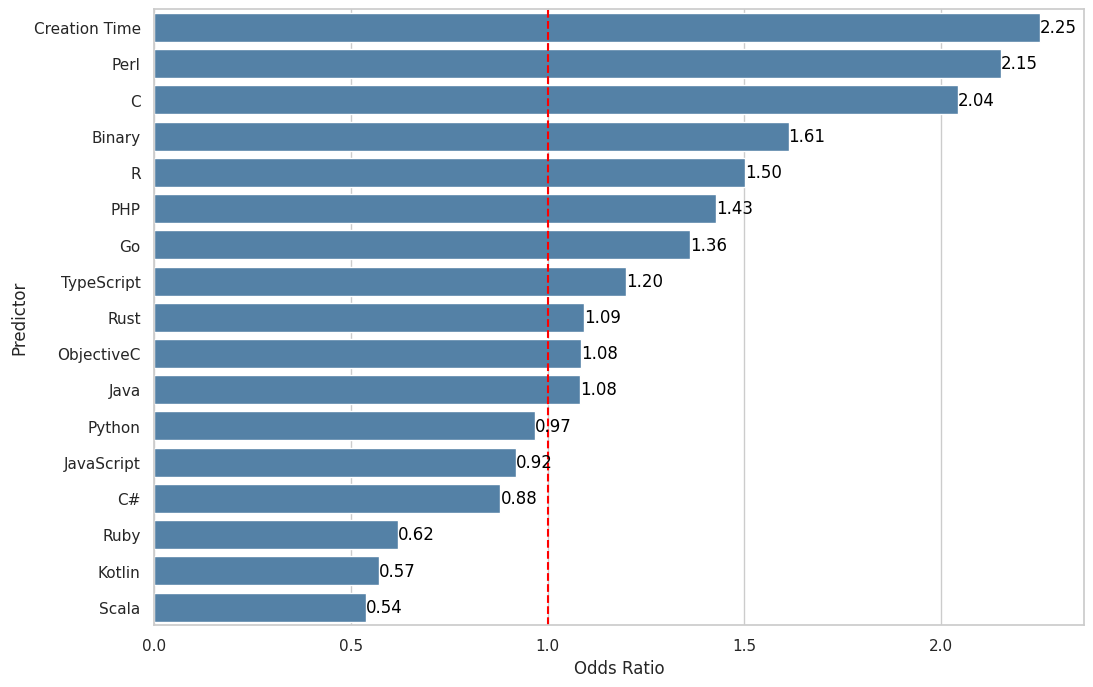

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
data = {
    'Predictor': ['Binary', 'Creation Time', 'C', 'C#', 'Go',
                  'JavaScript', 'Kotlin', 'ObjectiveC', 'Python', 'R',
                  'Rust', 'Scala', 'TypeScript', 'Java', 'PHP',
                  'Perl', 'Ruby'],
    'Coefficient': [0.4774792, 0.8107616, 0.714160357, -0.12774558, 0.3095185,
                    -0.083199, -0.56058, 0.080964, -0.03269689, 0.4070328,
                    0.087896, -0.6168255, 0.1826506, 0.0793699, 0.356139,
                    0.766412629, -0.4782127]
}

coef_df = pd.DataFrame(data)

# Transform coefficients to odds ratios
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])

# Sort the DataFrame for better visualization
coef_df = coef_df.sort_values(by='Odds Ratio', ascending=False)

# Assign colors
#sns.color_palette("viridis", len(coef_df))

# Plot the odds ratios
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Odds Ratio', y='Predictor', data=coef_df, color='steelblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Predictor')
plt.axvline(1, color='red', linestyle='--')

# Add value labels to the bars
for index, value in enumerate(coef_df['Odds Ratio']):
    plt.text(value, index, f'{value:.2f}', color='black', va="center")

plt.show()

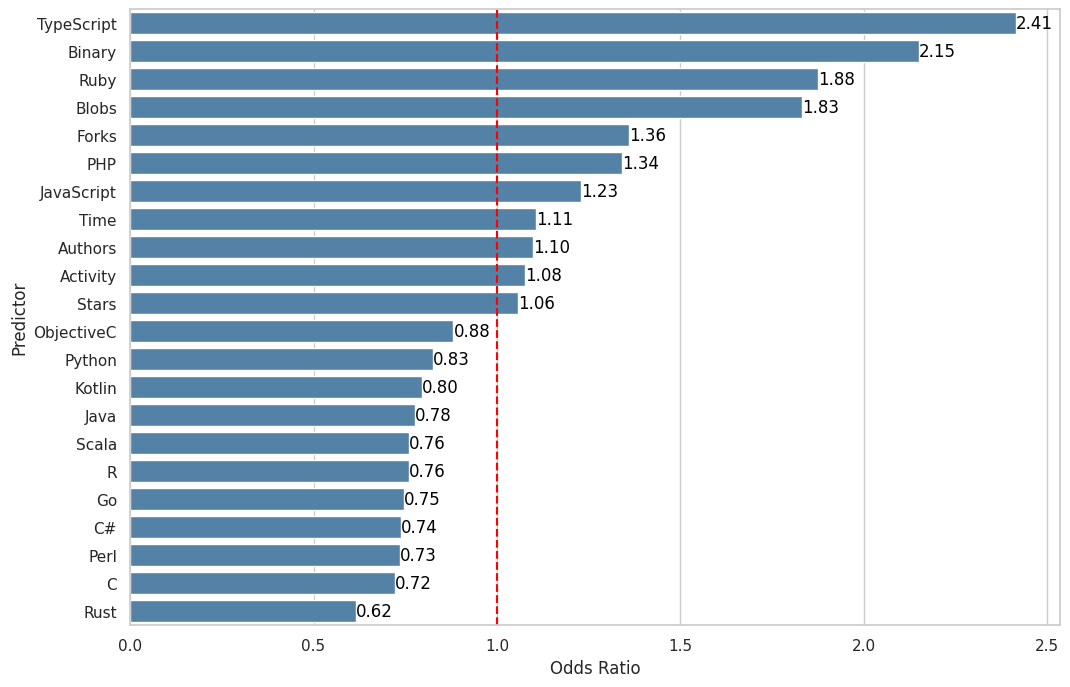

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
data_project_level = {
    'Predictor': ['Blobs', 'Binary', 'Authors', 'Forks', 'Stars',
                  'Time', 'Activity', 'C', 'C#', 'Go',
                  'JavaScript', 'Kotlin', 'ObjectiveC', 'Python', 'R',
                  'Rust', 'Scala', 'TypeScript', 'Java', 'PHP',
                  'Perl', 'Ruby'],
    'Coefficient': [0.605538, 0.7654626, 0.09404609, 0.3076883, 0.0566324,
                    0.1015705, 0.074698, -0.327478, -0.3041368, -0.29242797, 
                    0.2069604, -0.228806, -0.12648309, -0.1907007057, -0.2744687,
                    -0.484637, -0.27398432, 0.88139, -0.2545516, 0.2932134,
                    -0.308709, 0.6287403]
}

coef_df_project_level = pd.DataFrame(data_project_level)

# Transform coefficients to odds ratios
coef_df_project_level['Odds Ratio'] = np.exp(coef_df_project_level['Coefficient'])

# Sort the DataFrame for better visualization
coef_df_project_level = coef_df_project_level.sort_values(by='Odds Ratio', ascending=False)
    
# Plot the odds ratios
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Odds Ratio', y='Predictor', data=coef_df_project_level, color='steelblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Predictor')
plt.axvline(1, color='red', linestyle='--')

# Add value labels to the bars
for index, value in enumerate(coef_df_project_level['Odds Ratio']):
    plt.text(value, index, f'{value:.2f}', color='black', va="center")

plt.show()